In [14]:
from lib import LQG

In [15]:
import numpy as np
from rtree import index
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy import interpolate as interp

In [16]:
GRID_SIZE = 1000

In [65]:
# This is a terrible heuristic iterative solver to find the distances on a grid.
# it is not the smoothest idea, but it was fast to implement and works
def iterative_grid_solver(grid,max_iters = 300,dist = None,verbose = True): #should implement Dikjstra's instead?
    s = grid.shape[0] #size
    if dist is None:
        dist = 1E10+np.zeros_like(grid)
        dist[s//2,s//2] = 0
    for i in range(max_iters):
        if verbose and i%25 == 1: #give a result once every 25 iterations, skip the uninformative first one
            print np.mean(dist),
        for l in range(s):
            for d in [-1,1]:
                p = s//2+l*d;
                dist[:,p%s] = np.amin([dist[:,(p-1)%s]+grid[:,p%s],
                                       dist[:,(p+1)%s]+grid[:,p%s],
                                       dist[:, p%s]],axis = 0)
                dist[p%s,:] = np.amin([dist[(p-1)%s,:]+grid[p%s,:],
                                       dist[(p+1)%s,:]+grid[p%s,:],
                                       dist[ p%s,:]],axis = 0)
    return dist

After what we have set up above, solving the Eden in a LQG is now immediate:

1: 1: Define a GFF and the associated LQG

In [32]:
gff = LQG.TorusGFF(GRID_SIZE)
gamma = (8/3)**.5
lqg_distance = np.exp(gamma/2.*gff) #remember: we have to use the gamma/2 LQG!!
lqg_distance/= np.mean(lqg_distance)

In [33]:
Exp_Seed = np.random.exponential(size=lqg.shape) 

In [37]:
distance = iterative_grid_solver(lqg_distance*Exp_Seed);
distance/= np.mean(distance)

408.6320140370643
132.91546916536183
112.78336831887682
104.07831339446955
99.62931993226297
97.350813012456
96.18834979642446
95.59121888512395
95.29544949171911
95.176328882619
95.13647523540101
95.12639282784343
95.12498858952053
95.12498330072282
95.12498330072282
95.12498330072282


(0.0, 1.0, 1.0, 0.0)

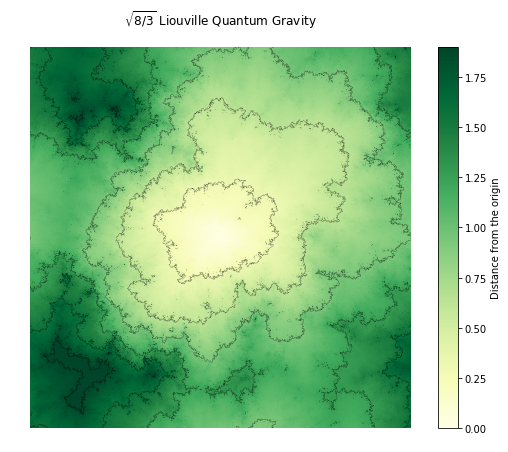

In [68]:
plt.figure(figsize=(10,7))

plt.title('$\\sqrt{8/3}$ Liouville Quantum Gravity\n')
vmax = np.percentile(distance,99)
plt.imshow(distance,cmap='YlGn',vmax=vmax,extent = [0,1,1,0]) 
plt.colorbar(label='Distance from the origin')

x = np.linspace(0,1,distance.shape[0])
X,Y = np.meshgrid(x,x)
levels = np.linspace(0,vmax,6+1)
plt.contour(X, Y, distance,levels = levels,colors = 'k',linewidths=.2)

plt.axis('off')

In [40]:
figure_params = {
    'title': '$\\sqrt{8/3}$ Liouville Quantum Gravity\n',
    'gamma': (8/3)**.5,
    'file_name':'Final_Simulations/sqrt83LQG_0DBM.png',
    'rand_seed': 27182818284
}

In [60]:
def make_nice_figures(gamma=1, 
                      file_name ='1LQG_0DBM.png',  
                      title='LQG Simulation',
                      gff = None,
                      grid_size = 1000,
                      averaging_times = 1,
                      rand_seed = None):
    
    if rand_seed is not None:
        np.random.seed( (rand_seed)%(2**32) );
    
    if gff is None:
        gff = LQG.TorusGFF(grid_size)
    grid_size = gff.shape[0]


    lqg_distance = np.exp(gamma/2.*gff) #remember: we have to use the gamma/2 LQG!!
    lqg_distance/= np.mean(lqg_distance)
    
    result = np.zeros_like(gff)
    
    for time in range(averaging_times):
        Exp_Seed = np.random.exponential(size=lqg.shape) 
        distance = iterative_grid_solver(lqg_distance*Exp_Seed);
        distance/= np.mean(distance)
        result += distance
        
    result /= np.mean(result)
    
    plt.figure(figsize=(10,7))

    plt.title(title)
    vmax = np.percentile(distance,99)
    plt.imshow(distance,cmap='YlGn',vmax=vmax,extent = [0,1,1,0]) 
    plt.colorbar(label='Distance from the origin')

    x = np.linspace(0,1,distance.shape[0])
    X,Y = np.meshgrid(x,x)
    levels = np.linspace(0,vmax,6+1)
    plt.contour(X, Y, distance,levels = levels,colors = 'k',linewidths=.2)

    plt.axis('off')
    plt.savefig(file_name, dpi=250)

 442.7712251362807 150.1011287298933 127.15493443606523 117.07943816880079 112.03888924092072 109.43280412240577 108.1981151351077 107.69662651943136 107.53195349517694 107.49008701941172 107.48331853754486 107.48314650290332 107.48314650290332 107.48314650290332 107.48314650290332 107.48314650290332 448.6433635738363 151.69237698982948 127.36862837003379 116.7234898303655 111.27746075969118 108.42554593630958 107.02457872618288 106.37560409767934 106.09879676670853 105.9848359323053 105.9424919036931 105.93009456079986 105.9284541549116 105.92843295250456 105.92843295250456 105.92843295250456 443.79889479214853 150.52565874982395 125.5163397237161 114.57531681114293 109.13943605079434 106.39267224956387 105.02439417479243 104.38506996366708 104.09117305724197 103.97239693520105 103.93594553996512 103.92699049897027 103.92560899730452 103.92558049981511 103.92558049981511 103.92558049981511 437.9563651632551 152.43149950377793 128.04628869021917 117.40282765206709 112.13971570172407 10

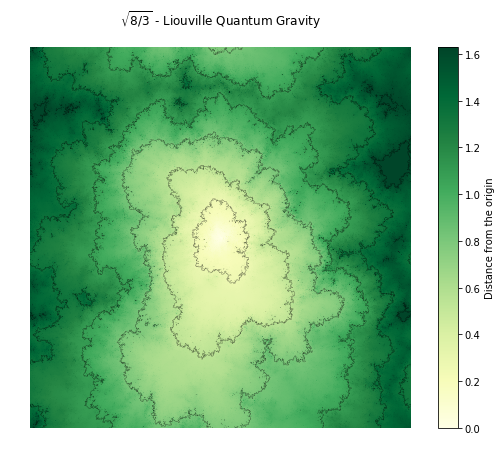

In [62]:
make_nice_figures(
    title = '$\\sqrt{8/3}$ - Liouville Quantum Gravity\n',
    gamma = (8/3)**.5,
    file_name = 'Final_Simulations/sqrt83LQG_0DBM.png',
    rand_seed = 27182818284,
    averaging_times = 5
)

465.20351731490393 189.7633938981072 161.95146755031107 149.6122639729355 143.49765550395026 140.47816632444363 139.09621223102164 138.5734052828581 138.42582059102818 138.40000953892354 138.3976639744372 138.39766333125726 138.39766333125726 138.39766333125726 138.39766333125726 138.39766333125726 471.8483261745152 189.70810245925827 161.60670942067185 148.80064145786255 142.17744643566317 138.84000611083056 137.24468659600393 136.55628468352617 136.28375776066835 136.18906162966542 136.16668213557455 136.1648524595199 136.1648369529337 136.1648369529337 136.1648369529337 136.1648369529337 463.912777893358 189.47722541468883 159.63351678862222 146.63359546359848 140.0700145712268 136.781057428701 135.30574426071513 134.7366190042714 134.54636066412493 134.49549894165457 134.4863896894824 134.4855064899836 134.4855057104834 134.4855057104834 134.4855057104834 134.4855057104834 462.1565506146483 191.30544335809765 163.0735579162521 150.10780436702046 143.5127118577309 140.32241375863455

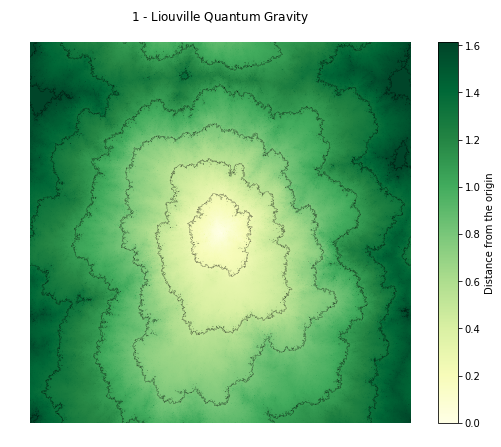

In [63]:
make_nice_figures(
    title = '$1$ - Liouville Quantum Gravity\n',
    gamma = 1,
    file_name = 'Final_Simulations/1LQG_0DBM.png',
    rand_seed = 27182818284,
    averaging_times = 5
)

482.8233211711639 234.79646378979706 200.2135584417462 184.7263837668147 176.91601169674686 172.94176374894963 171.0956832238583 170.390891372761 170.20445781142948 170.17481431406006 170.17325485032453 170.1732548500089 170.1732548500089 170.1732548500089 170.1732548500089 170.1732548500089 490.5541469547893 232.2444358018825 198.22928427015913 183.00449859221712 175.47148844346953 171.91678782148117 170.48045454260483 169.9913213969808 169.8710120998665 169.85251872815692 169.8515839821789 169.8515839821789 169.8515839821789 169.8515839821789 169.8515839821789 169.8515839821789 478.4772269845763 232.92855156278608 197.47486972223484 181.86247510784779 174.35834212897424 170.84303854886682 169.30655890041103 168.7663062400502 168.62659308266493 168.60335645455478 168.60145405433894 168.60145273460643 168.60145273460643 168.60145273460643 168.60145273460643 168.60145273460643 480.9848774339216 234.7262669768238 200.30569894669247 184.94683884854953 177.5533646484018 174.14202638182778 

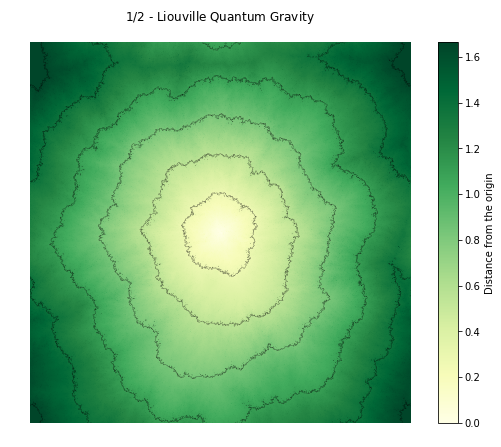

In [64]:
make_nice_figures(
    title = '$1/2$ - Liouville Quantum Gravity\n',
    gamma = .5,
    file_name = 'Final_Simulations/0.5LQG_0DBM.png',
    rand_seed = 27182818284,
    averaging_times = 5
)

 402.23568069371845 100.02198578734922 83.5145751004303 76.24392949360728 72.55533709417185 70.64487427084374 69.67744569834419 69.18719765220833 68.9281670031462 68.79128873886081 68.72636029812661 68.704744076252 407.1756973272359 101.29570956910301 83.09591608365618 75.72765818164365 72.04214720764932 70.08563117866763 69.0423153875763 68.520703892858 68.25724293956294 68.10988210514401 68.03311007419587 67.99880258996224 405.54559504123097 100.08129038665052 82.51814941375079 75.08896690221975 71.44830741610036 69.48416774980093 68.42370668202987 67.84609331937018 67.49381580106558 67.29009465886499 67.18196397964059 67.12777835802774 393.7277660017951 102.24884071961536 84.31563583460769 76.82445982704854 73.0645814919295 71.0834765310316 70.03389080567104 69.49608915864944 69.22787134983263 69.09355670984979 69.01814868332482 68.97506808404566 425.1697199562339 102.65565636953981 84.99294029021719 77.54193603519082 73.79484554504087 71.87098557973368 70.87135489358934 70.34554574

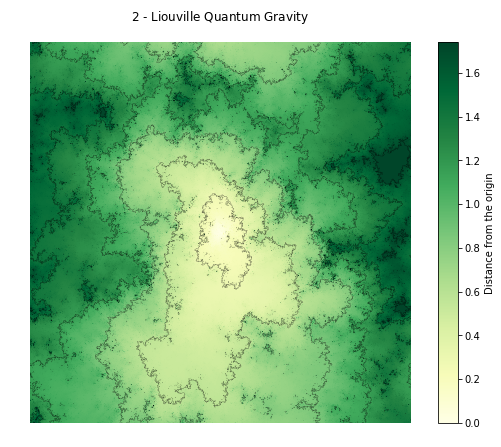

In [67]:
make_nice_figures(
    title = '$2$ - Liouville Quantum Gravity\n',
    gamma = 2,
    file_name = 'Final_Simulations/2LQG_0DBM.png',
    rand_seed = 27182818284,
    averaging_times = 5
)

In [84]:
if True:
    lqg_distance = np.exp(gamma/2.*gff) #remember: we have to use the gamma/2 LQG!!
    lqg_distance/= np.mean(lqg_distance)
    
    result = np.zeros_like(gff)
    
    for time in range(10):
        Exp_Seed = np.random.exponential(size=lqg.shape) 
        distance = iterative_grid_solver(lqg_distance*Exp_Seed);
        distance/= np.mean(distance)
        result += distance
        
    distance = np.mean(result)

404.86471672336796 136.708354275302 114.8103137596833 105.29030365027253 100.47480595275424 97.95828080453786 96.68988053147903 96.08647330316757 95.83296066768703 95.74539419922799 95.72508559441752 95.72315904421875 410.3417393954801 135.34505401562205 113.97401596448748 104.96066685851558 100.48391664885393 98.23231675921251 97.11594394377045 96.56581625004077 96.28636933975622 96.1547065424074 96.10445068068721 96.08984273227982 408.09439864118167 134.68038045031892 113.2662598932387 104.0097233871774 99.40233061604825 97.06230469677396 95.8446055398068 95.22380893411058 94.91940481154744 94.78152381794287 94.73105268406661 94.71526472795614 392.0874289455564 136.13406534658864 114.38580170650715 105.33660236790391 100.88216927499916 98.59617198916486 97.41836561179569 96.86162761002419 96.62149310835713 96.53158131701387 96.50854499374101 96.50419966511866 384.9532210306307 137.38908814837384 115.8144715547134 106.06374836902867 101.21754362718093 98.74328545147097 97.510294984186

TypeError: Invalid dimensions for image data

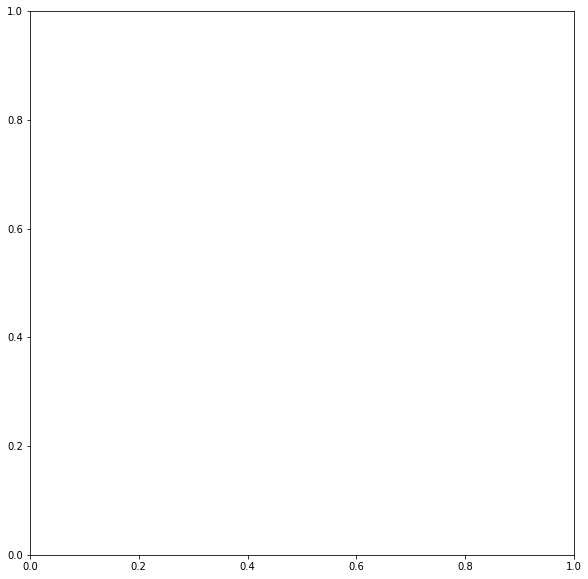

In [85]:
plt.figure(figsize=(10,10))

img = sum(distance>i for i in np.linspace(.1,.75,5))%2
plt.imshow(1-img,cmap='Greys',vmax=1,vmin=0,extent = [0,1,1,0]) 

plt.axis('off')

In [75]:
plt.colorm

1.0